### The goal of this notebook is to measure the Right or Left stimulus from the firing rate of neurons across the depth of the probe and time period before and after stimlus onset. I did the analysis for one probe example with around 94 channels in V1. 

#  Z-score firing rate in right / left trials for each depth and time 

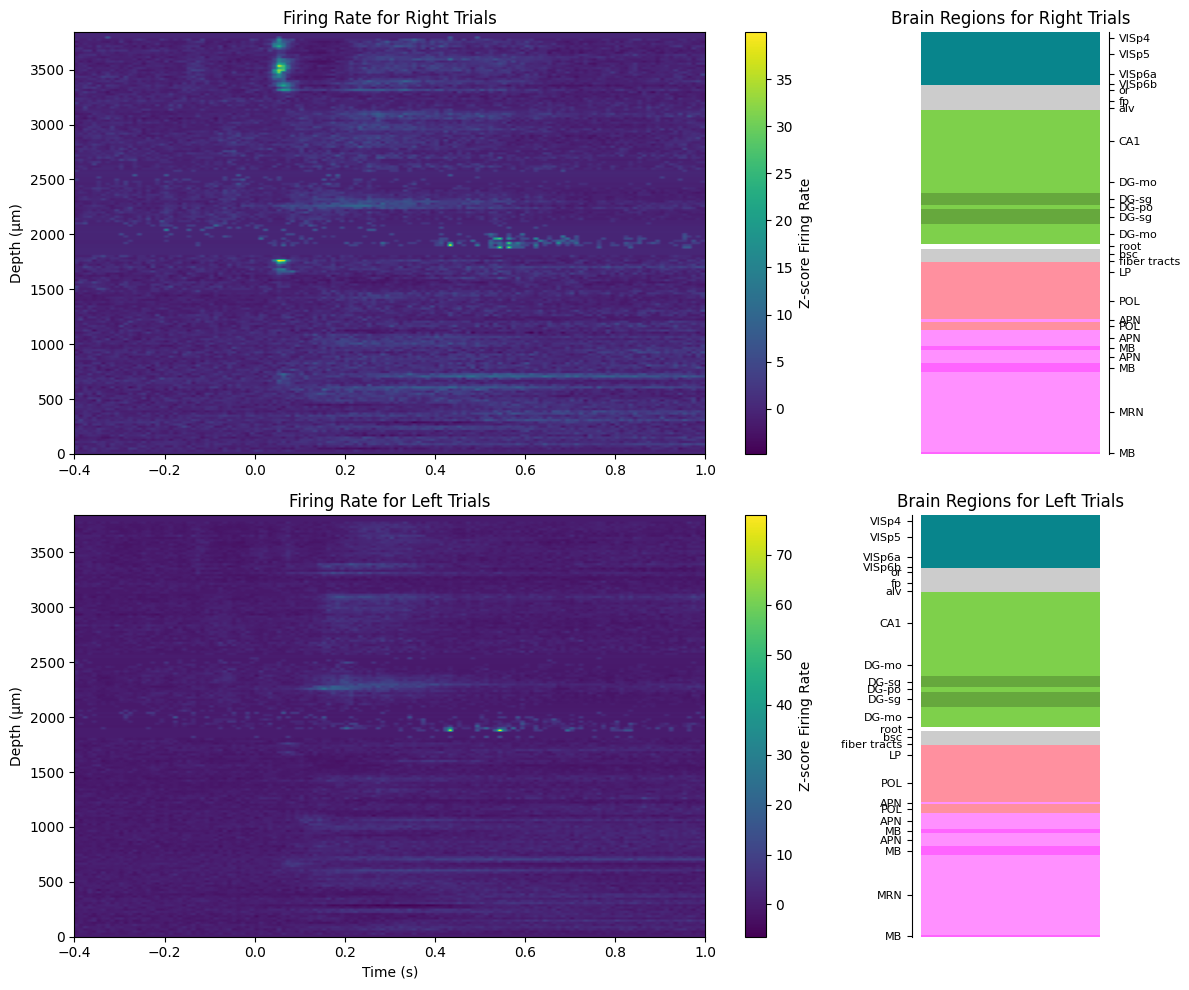

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from brainbox.ephys_plots import plot_brain_regions
import pandas as pd
from get_data import get_behavior, get_channels, get_spikes
from firing_rate import right_left_firingRates_onDepths



# an example pid and eid 
pid = 'a3d13b05-bf4d-427a-a2d5-2fe050d603ec' # probe id (94 channels in V1)
eid = '03cf52f6-fba6-4743-a42e-dd1ac3072343' # experiment id

############################
# get the firing rate for right and left trials
z_score_right, z_score_left,  times, depths, ids, acronyms, ch_indexs= right_left_firingRates_onDepths(eid, pid, t_bin=0.1, d_bin=20, pre_stim=0.4, post_stim=1, depth_lim=[0, 3840], mode='download')
# average firing rate for right and left trials
right_activity_mean = np.mean(z_score_right, axis=0)
left_activity_mean = np.mean(z_score_left, axis=0)
##############################


###############################
# Plotting
true_depths = depths
# Create a figure with GridSpec for multiple plots
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 2, width_ratios=[4, 1])  # 2 rows, 2 columns

# First column, first row: Right Trials
ax1 = fig.add_subplot(gs[0, 0])
im1 = ax1.imshow(right_activity_mean, aspect='auto', origin='lower',
                  extent=[times[0], times[-1], depths[0], depths[-1]], 
                  cmap='viridis')
ax1.set_title('Firing Rate for Right Trials')
ax1.set_ylabel('Depth (µm)')
ax1.set_ylim(0, 3840)
plt.colorbar(im1, ax=ax1, label='Z-score Firing Rate')

# Second column, first row: Brain Regions for Right Trials
ax2 = fig.add_subplot(gs[0, 1])  # Second column, first row
plot_brain_regions(ids, true_depths, display=True, ax=ax2, 
                   title='Brain Regions for Right Trials', label='right')

# First column, second row: Left Trials
ax3 = fig.add_subplot(gs[1, 0])
im2 = ax3.imshow(left_activity_mean, aspect='auto', origin='lower',
                  extent=[times[0], times[-1], depths[0], depths[-1]], 
                  cmap='viridis')
ax3.set_title('Firing Rate for Left Trials')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Depth (µm)')
ax3.set_ylim(0, 3840)
plt.colorbar(im2, ax=ax3, label='Z-score Firing Rate')

# Second column, second row: Brain Regions for Left Trials
ax4 = fig.add_subplot(gs[1, 1])  # Second column, second row
plot_brain_regions(ids, true_depths, display=True, ax=ax4, 
                   title='Brain Regions for Left Trials', label='left')

# Layout adjustment
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
##########################



# compute the decoding accuracy for each depth and time bins using AU-ROC

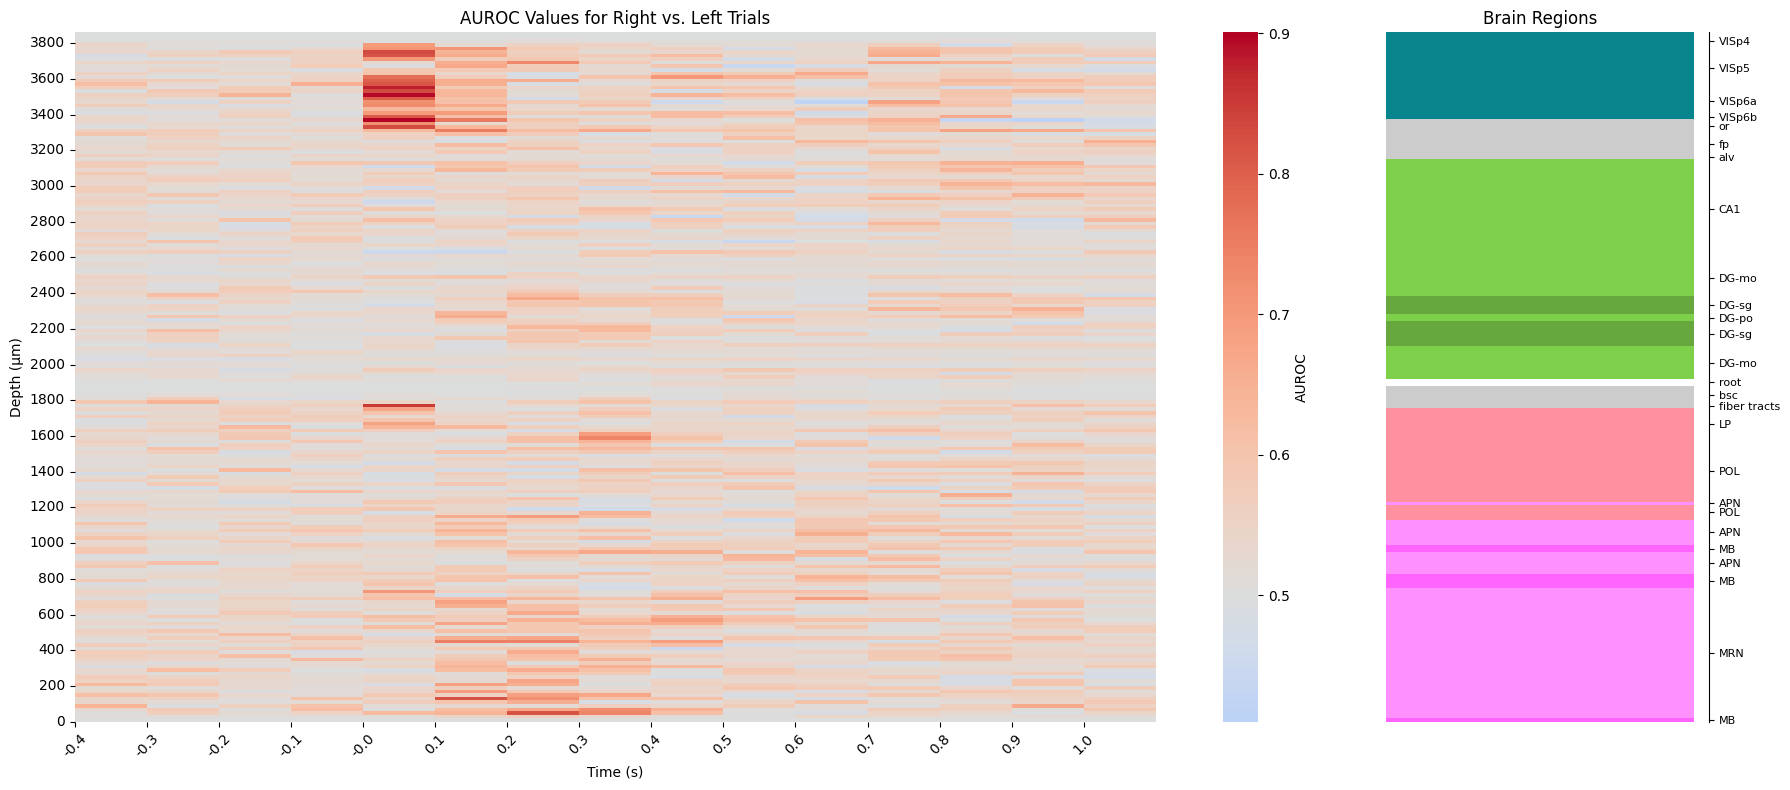

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from brainbox.ephys_plots import plot_brain_regions
from compute_decodability import compute_decodability



############################
# compute the decodability
auroc_values = compute_decodability(z_score_condition1 =z_score_right,  z_score_condition2 = z_score_left)








#########################
# Plotting
# Create a figure with GridSpec for multiple plots
fig = plt.figure(figsize=(18, 8))
gs = GridSpec(1, 2, width_ratios=[4, 1])  # 1 row, 2 columns

# First column: AUROC Heatmap
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(auroc_values, cmap='coolwarm', center=0.5, cbar_kws={'label': 'AUROC'}, ax=ax1)
ax1.set_title('AUROC Values for Right vs. Left Trials')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Depth (µm)')

# Set x ticks
ax1.set_xticks(np.arange(len(times)))
ax1.set_xticklabels(np.round(times, 2), rotation=45)

# Set y ticks every 10 units
y_ticks_indices = np.arange(0, len(depths), 10)
ax1.set_yticks(y_ticks_indices)
ax1.set_yticklabels(depths[y_ticks_indices])
ax1.invert_yaxis()
# Second column: Plot Brain Regions
ax2 = fig.add_subplot(gs[0, 1])  # Second column
# Assuming you have the necessary parameters: ids and true_depths
plot_brain_regions(ids, true_depths, display=True, ax=ax2, 
                   title='Brain Regions', label='right')

# Layout adjustment
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
